In [122]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)
from Neuronal_dynamics import *

torch.Size([64, 1, 28, 28])


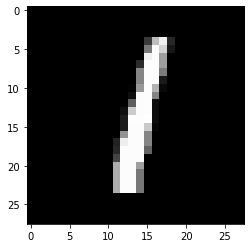

In [123]:
MNIST_data = torchvision.datasets.MNIST(root= './Datasets', download=True, transform = transforms.Compose([transforms.ToTensor(),\
 ]))
data_loader = DataLoader(MNIST_data, batch_size=64, shuffle = True)
test_loader = DataLoader(torchvision.datasets.MNIST('./Datasets', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])), batch_size=10, shuffle = True)
iterator = iter(data_loader)
images, labels = iterator.next()
plt.imshow(images[5].reshape(28, 28), cmap = "gray")
print(images.shape)

In [124]:
labels

tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3, 6, 5, 9, 5])

In [125]:
images, labels = iterator.next()
#convert images to numpy array of size 28 * 28
images  = images.numpy()

In [126]:
images[11].shape
image = images[11].reshape(28, 28)

In [127]:
image
image[np.where(image > 0.000)] = 1
image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1

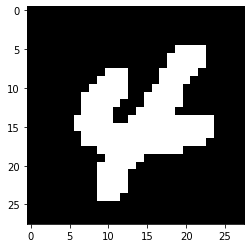

In [128]:
plt.imshow(image, cmap = "gray")

In [129]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A = A.T.reshape(-1)
print(A)

[1 4 7 2 5 8 3 6 9]


In [130]:
E_l = 0
R_l = 1
t_ref = 5
tau = 10 
v_reset = 0
dt = 0.1
T_max = 100
I = 1.2525 # 1.2525 is the best for 0.05Hz freq
v_0 = 0
v_th = 0.96 # 0.96 is the best for 0.05 Hz freq
t = 0
xs = []
ys = []
capacitance = tau/R_l
spike_count = 0
print("capacitance = ", capacitance)

capacitance =  10.0


In [131]:
if_1 = IF(v_th, capacitance, E_l, v_reset, t_ref)
voltages,times, count = if_1.see_image(image, 0.09, dt, option="row_wise", time_interval = 1)
print("spike_count = ", spike_count)
print(count)

784
spike_count =  0
1


In [132]:
len(voltages)
len(times)

7840

Text(0, 0.5, 'IF - Membrane Potential')

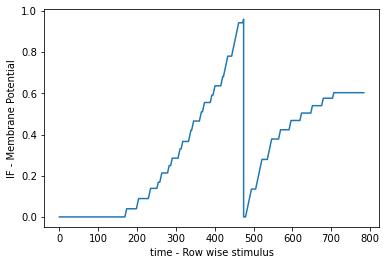

In [133]:
plt.plot(times, voltages)
plt.xlabel("time - Row wise stimulus")
plt.ylabel("IF - Membrane Potential")

784
spike_count =  0


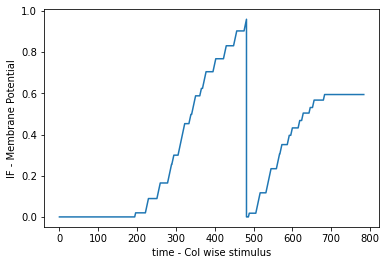

In [134]:
voltages,times, count = if_1.see_image(image, 0.09, dt, option="col_wise", time_interval = 1)
print("spike_count = ", spike_count)
plt.plot(times, voltages)
plt.xlabel("time - Col wise stimulus")
plt.ylabel("IF - Membrane Potential")
plt.show()

In [135]:
LIF_1 = LIF(v_th, tau, E_l, R_l , v_reset, t_ref)
voltages, times, spike_count = LIF_1.see_image(image,18.0, dt, option="row_wise", time_interval = 0.05)
print(spike_count)

39.2
2


Text(0, 0.5, 'LIF - Membrane Potential')

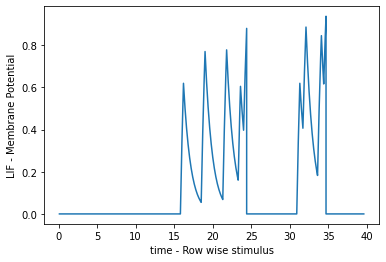

In [136]:
plt.plot(times, voltages)
plt.xlabel("time - Row wise stimulus")
plt.ylabel("LIF - Membrane Potential")

In [137]:
voltages, times, spike_count = LIF_1.see_image(image,18.0, dt, option="col_wise", time_interval = 0.05)
print(spike_count)

39.2
3


Text(0, 0.5, 'LIF - Membrane Potential')

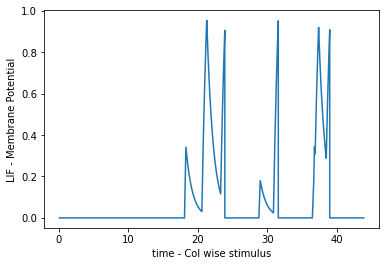

In [138]:
plt.plot(times, voltages)
plt.xlabel("time - Col wise stimulus")
plt.ylabel("LIF - Membrane Potential")